I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

#### Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

#### Code to loading data and modules:

import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

from patsy import dmatrices

from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation

import train_test_split

from sklearn import metrics

from sklearn.cross_validation import cross_val_score 

dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not

dta['affair'] = (dta.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \ religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

## Importing all the essential libraries and acquiring data set

In [1]:
# Code to loading data and modules:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [2]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


## Data Preprocessing

In [3]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

df = pd.concat([X, y], axis=1)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


## Data Visualization
### How various factors affect the husband-wife relationship ?

In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


#### As expected, women who have affairs rate their marriages lower, on an average.

In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


#### With an increase in women's age, years of marriage, and children there is a decline in marriage rating.

Text(0.5, 0, 'rate_marriage')

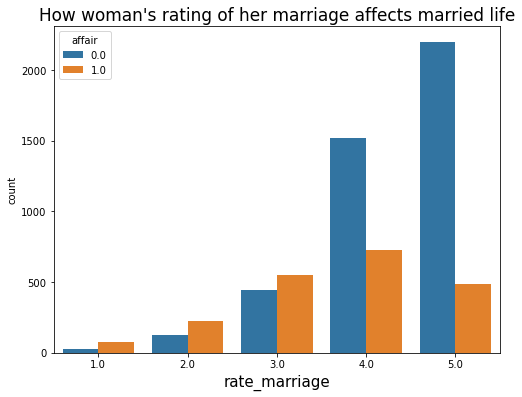

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='rate_marriage', data=df, hue='affair')
plt.title("How woman's rating of her marriage affects married life", fontsize=17)
plt.xlabel('rate_marriage', fontsize=15)

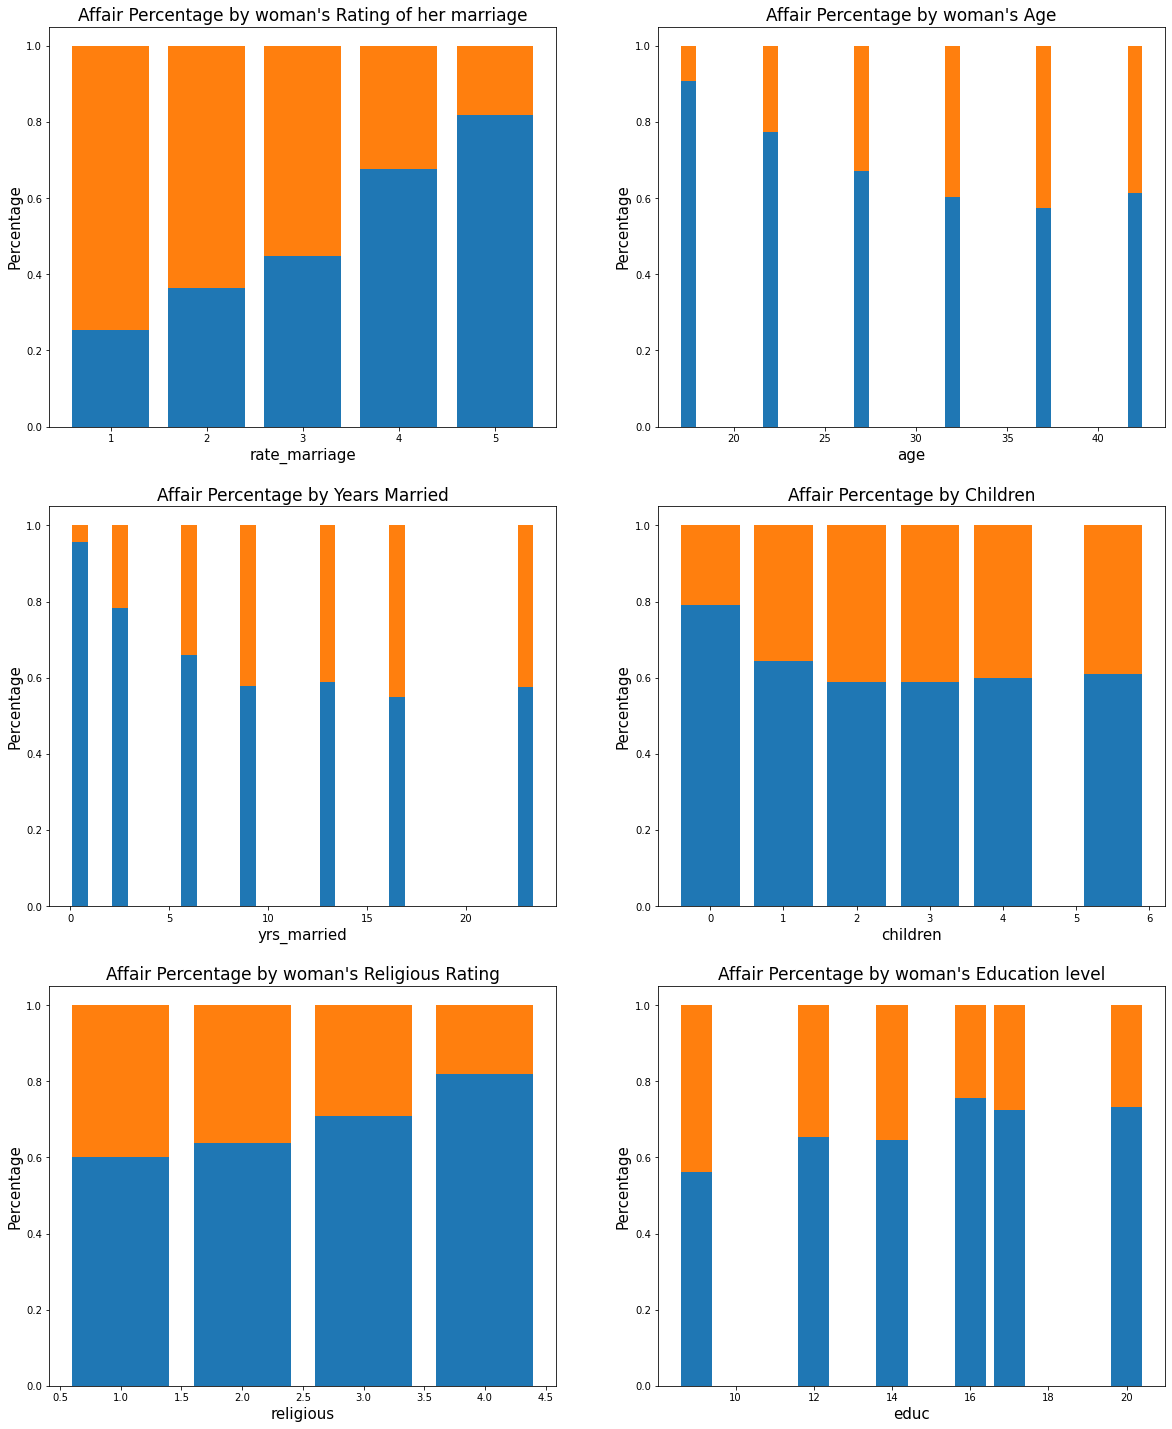

In [7]:
features = {'rate_marriage':"woman's Rating of her marriage", 'age':"woman's Age", 'yrs_married':'Years Married',
            'children':'Children', 'religious':"woman's Religious Rating", 'educ':"woman's Education level"}
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column, value in features.items():
    plt.subplot(3,2,plotnumber)
    affair_column = pd.crosstab(df[column], df['affair'])
    affair_column = affair_column.div(affair_column.sum(1), axis=0)
    plt.bar(affair_column.index, affair_column[0.0])
    plt.bar(affair_column.index, affair_column[1.0], bottom=affair_column[0.0])
    plt.title('Affair Percentage by '+value, fontsize=17)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    plotnumber+=1
plt.show()

### How woman's rating of her marriage affects married life ?
#### From above figures we can say large bunch of women are satisfied with their married life, irrespective of their affairs. Also higher the woman's rating of her marriage, lesser the chance of extra marital affairs.

### How woman's age affects married life ?
#### Older women have greater chances of extra marital affairs.

### How years of marriage affects married life ?
#### As the married couples spend more and more years together there would be greater chance that the wife would be in extra marital relations. Less extra marital affairs seen in newly married couples.

### How number of children affects the husband-wife relationship ?
#### From these visuals we see that more number of children lead to more chances of extra marital affairs.

### How religiousness affects married life ?
#### More the woman will be religious, lesser will be the chance that woman will have extra marital affairs.

### How woman's education affects married life ?
#### Higher the woman's education, lesser the chance of extra marital affairs. Those women who are in college or have lower education level have shown more interest in extra marital affairs.

## Modeling

### Multicollinearity

In [8]:
# First scale the dataset and then check for multicollinearity

#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

### fit_transform
X_scaled=scaler.fit_transform(X.drop('Intercept', axis=1))

# we use variance_inflation_factor from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = X.columns[1:]

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif

,Features,VIF
0,occ_2,19.340780
1,occ_3,39.335618
2,occ_4,32.931910
3,occ_5,17.057165
4,occ_6,3.697959
5,occ_husb_2,5.566292
6,occ_husb_3,2.991070
7,occ_husb_4,6.930281
8,occ_husb_5,6.577077
9,occ_husb_6,3.185266


#### Here, we have the correlation values for all the features. The VIFs for occupation features are more than 10, indicating that multicollinearity is a serious concern. Lets check the VIFs after removing oct_s feature.

In [9]:
# delete the oct_3 feature from df_scaled
X_scaled1 = np.delete(X_scaled, 1, 1)

vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = np.delete(X.columns, [0, 2], 0)

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled1, i) for i in range(X_scaled1.shape[1])]
vif

,Features,VIF
0,occ_2,1.177578
1,occ_4,1.581345
2,occ_5,1.151845
3,occ_6,1.166553
4,occ_husb_2,5.530741
5,occ_husb_3,2.976197
6,occ_husb_4,6.886803
7,occ_husb_5,6.533262
8,occ_husb_6,3.175292
9,rate_marriage,1.038535


#### All the VIFs are now less than 10. We will first build the model with all the features and then without the oct_3 feature and compare the results.

In [10]:
# Add the intercept column to the scaled data
df_scaled = pd.DataFrame(X_scaled)
df_scaled = pd.concat([X['Intercept'], df_scaled], axis=1)

### Splitting the data into train and test set, fitting the classification model and doing prediction

In [11]:
y = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_test_predicted = clf.predict(x_test)
y_train_predicted = clf.predict(x_train)

(5092, 17)
(5092,)
(1274, 17)
(1274,)


In [12]:
y_test_predicted

array([1., 1., 0., ..., 1., 1., 0.])

In [13]:
pred_probs = clf.predict_proba(x_test)
pred_probs

array([[0.42504868, 0.57495132],
       [0.43710908, 0.56289092],
       [0.60817733, 0.39182267],
       ...,
       [0.21794381, 0.78205619],
       [0.24778883, 0.75221117],
       [0.76551243, 0.23448757]])

#### Coefficients of the features

In [14]:
df_coef=pd.DataFrame()
df_coef['Features'] = X.columns
df_coef['Coefficients'] = np.transpose(clf.coef_)
df_coef

,Features,Coefficients
0,Intercept,0.001189
1,occ_2,0.141282
2,occ_3,0.377146
3,occ_4,0.269855
4,occ_5,0.368905
5,occ_6,0.156857
6,occ_husb_2,-0.009684
7,occ_husb_3,0.036007
8,occ_husb_4,0.005228
9,occ_husb_5,0.005609


#### Here age feature is having negative coefficient which is not correct, as we have seen previously that with increase in woman's age, chances of affair increase. It seems age and yrs_married features are correlated. We may consider droping one of them from our model.

In [15]:
print("Train set accuracy score: ", metrics.accuracy_score(y_train, y_train_predicted))
print("Test set accuracy score :",  metrics.accuracy_score(y_test, y_test_predicted))

Train set accuracy score:  0.7228986645718775
Test set accuracy score : 0.7401883830455259


#### As we see that training and test dataset have similar accuracy score, there is no overfitting in our model.

### Confusion matrix to check TP, TN, FP, FN values

In [16]:
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
conf_mat

array([[782,  90],
       [241, 161]], dtype=int64)

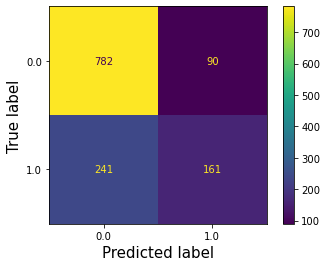

In [17]:
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.show()

#### Here we should be careful about FP, because if our model predicts that woman is having affair, but in actual she is not having any affair, this may lead to divorce for the mistake she has not done. So we should show some carefulness about FP value when we are dealing with such sensitive kind of predictions.

### Finding Precision, Recall, F1-Score

In [18]:
true_negative = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_positive = conf_mat[1][1]

In [19]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.7401883830455259

In [20]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.6414342629482072

In [21]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.40049751243781095

In [22]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.49310872894333846

In [23]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83       872
         1.0       0.64      0.40      0.49       402

    accuracy                           0.74      1274
   macro avg       0.70      0.65      0.66      1274
weighted avg       0.73      0.74      0.72      1274



### Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [24]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72156863, 0.72352941, 0.72495088, 0.71709234, 0.74263261,
        0.6935167 , 0.72102161, 0.73084479, 0.72102161, 0.72298625]),
 0.7219164836858123)

#### Looks good. Model still performing at 72% accuracy.

### Dropping columns with high VIF. Model without the oct_3 and yrs_married features

In [25]:
X_scaled2 = np.delete(X_scaled1, 11, 1)

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = np.delete(X.columns, [0, 2, 13], 0)

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled2, i) for i in range(X_scaled2.shape[1])]
vif

,Features,VIF
0,occ_2,1.175634
1,occ_4,1.578579
2,occ_5,1.151816
3,occ_6,1.166521
4,occ_husb_2,5.530141
5,occ_husb_3,2.975854
6,occ_husb_4,6.886735
7,occ_husb_5,6.533231
8,occ_husb_6,3.175042
9,rate_marriage,1.038240


In [26]:
# Add the intercept column to the scaled data
df_scaled = pd.DataFrame(X_scaled2)
df_scaled = pd.concat([X['Intercept'], df_scaled], axis=1)

In [27]:
# Splitting the data into train and test set, fitting the classification model and doing prediction
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_test_predicted = clf.predict(x_test)
y_train_predicted = clf.predict(x_train)
pred_probs = clf.predict_proba(x_test)
print("Train set accuracy score: ", metrics.accuracy_score(y_train, y_train_predicted))
print("Test set accuracy score :",  metrics.accuracy_score(y_test, y_test_predicted))

(5092, 15)
(5092,)
(1274, 15)
(1274,)
Train set accuracy score:  0.7189709347996858
Test set accuracy score : 0.728414442700157


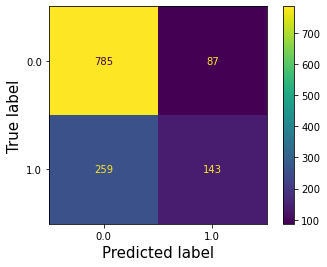

In [28]:
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       872
         1.0       0.62      0.36      0.45       402

    accuracy                           0.73      1274
   macro avg       0.69      0.63      0.64      1274
weighted avg       0.71      0.73      0.70      1274



#### Accuracy, Precision, Recall, F1-score values are similar to our previous model having all the features.

#### Coefficients of the features

In [30]:
df_coef=pd.DataFrame()
df_coef['Features'] = np.delete(X.columns, [2, 13], 0)
df_coef['Coefficients'] = np.transpose(clf.coef_)
df_coef

,Features,Coefficients
0,Intercept,-0.000013
1,occ_2,-0.128163
2,occ_4,-0.081041
3,occ_5,0.131738
4,occ_6,0.059449
5,occ_husb_2,0.006193
6,occ_husb_3,0.040910
7,occ_husb_4,0.025284
8,occ_husb_5,0.026383
9,occ_husb_6,0.020830


#### Here age feature is having positive coefficient which is correct.

### Dropping columns with high VIF. Model without the oct_3 and age features

In [31]:
X_scaled3 = np.delete(X_scaled1, 10, 1)

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = np.delete(X.columns, [0, 2, 12], 0)

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled3, i) for i in range(X_scaled3.shape[1])]
vif

,Features,VIF
0,occ_2,1.177502
1,occ_4,1.580247
2,occ_5,1.150833
3,occ_6,1.166276
4,occ_husb_2,5.520282
5,occ_husb_3,2.966434
6,occ_husb_4,6.875922
7,occ_husb_5,6.510032
8,occ_husb_6,3.162562
9,rate_marriage,1.038271


In [32]:
# Add the intercept column to the scaled data
df_scaled = pd.DataFrame(X_scaled3)
df_scaled = pd.concat([X['Intercept'], df_scaled], axis=1)

In [33]:
# Splitting the data into train and test set, fitting the classification model and doing prediction
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_test_predicted = clf.predict(x_test)
y_train_predicted = clf.predict(x_train)
pred_probs = clf.predict_proba(x_test)
print("Train set accuracy score: ", metrics.accuracy_score(y_train, y_train_predicted))
print("Test set accuracy score :",  metrics.accuracy_score(y_test, y_test_predicted))

(5092, 15)
(5092,)
(1274, 15)
(1274,)
Train set accuracy score:  0.720738413197172
Test set accuracy score : 0.7394034536891679


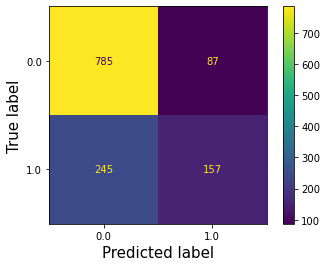

In [34]:
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.show()

#### Accuracy score and confusion matrix shows that Model without the oct_3 and age feature is better than the Model without the oct_3 and yrs_married feature.

In [35]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83       872
         1.0       0.64      0.39      0.49       402

    accuracy                           0.74      1274
   macro avg       0.70      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274



#### Accuracy, Precision, Recall, F1-score values are similar to our previous model having all the features.

#### Coefficients of the features

In [36]:
df_coef=pd.DataFrame()
df_coef['Features'] = np.delete(X.columns, [2, 12], 0)
df_coef['Coefficients'] = np.transpose(clf.coef_)
df_coef

,Features,Coefficients
0,Intercept,0.000506
1,occ_2,-0.115336
2,occ_4,-0.073255
3,occ_5,0.125663
4,occ_6,0.057352
5,occ_husb_2,-0.009786
6,occ_husb_3,0.029490
7,occ_husb_4,0.005033
8,occ_husb_5,-0.003734
9,occ_husb_6,0.005110


### Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [37]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72156863, 0.71372549, 0.72298625, 0.71709234, 0.74263261,
        0.69155206, 0.70923379, 0.74066798, 0.7151277 , 0.71905697]),
 0.7193643822951578)

#### Looks good. Model still performing at 72% accuracy.

### ROC Curve

In [38]:
# Area Under Curve
auc = metrics.roc_auc_score(y_test, pred_probs[:, 1])
auc

0.7511510680542243

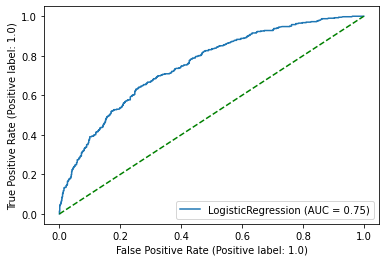

In [39]:
metrics.plot_roc_curve(clf, x_test, y_test)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')